# Neural Network

*With PyTorch*

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils

# custom file
from dataset import FaceEmotionsDataset
from transform import Rescale, RandomCrop, ToTensor, Normalize

### Load the data

To load the dataset I use a custom dataset class and custom transforms process our dataset.

In [2]:
data_transform = transforms.Compose([
    Rescale(68),
    RandomCrop(64),
    ToTensor()
])

emotions = ['neutral', 
            'happiness', 
            'surprise', 
            'sadness', 
            'anger', 
            'disgust',
            'fear',
            'contempt']

dataset = FaceEmotionsDataset(csv_file='csv/cleaned_data.csv',
                                          root_dir='img/',
                                          classes=emotions,
                                          transform=data_transform)

dataloader = DataLoader(dataset, batch_size=4,
                        shuffle=True, num_workers=4)

#### Batch preview

0 torch.Size([4, 1, 64, 64]) torch.Size([4])


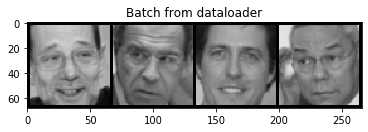

1 torch.Size([4, 1, 64, 64]) torch.Size([4])


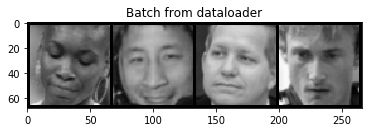

In [3]:
for i_batch, sample_batched in enumerate(dataloader):
    images_batch, emotions_batch = sample_batched['image'], sample_batched['emotion']
    print(i_batch, images_batch.size(),emotions_batch.size())

    # observe 4th batch and stop.
    
    plt.figure()
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    plt.title('Batch from dataloader')
    plt.show()
    
    if i_batch == 1:
        break
        

### Split the dataset

In [4]:
validation_split = 0.2
shuffle_dataset = True
random_seed = 0

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)

test_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

#### Train dataset size

In [5]:
len(train_loader)

2738

#### Test dataset size

In [6]:
len(test_loader)

685

### Define the network

In [7]:
# TODO